## Imports

In [28]:
from statsbombpy import sb
import mplsoccer as mpl
from kloppy import metrica
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

## Colors encoding for Heatmaps

In [29]:
from matplotlib.colors import ListedColormap , to_hex
def build_cmap(color1, color2):
    r,g,b = color1
    r_,g_,b_ = color2
    N = 256
    A = np.ones((N, 4))
    A[:, 0] = np.linspace(r, 1, N)
    A[:, 1] = np.linspace(g, 1, N)
    A[:, 2] = np.linspace(b, 1, N)
    cmp = ListedColormap(A)

    B = np.ones((N, 4))
    B[:, 0] = np.linspace(r_, 1, N)
    B[:, 1] = np.linspace(g_, 1, N)
    B[:, 2] = np.linspace(b_, 1, N)
    cmp_ = ListedColormap(B)

    newColors = np.vstack((cmp(np.linspace(0, 1, 128)),
                            cmp_(np.linspace(0, 1, 128))))
    return ListedColormap(newColors)

blue, red = (44,123,182), (215,25,28)
blue = [x/256 for x in blue]
red = [x/256 for x in red]
diverging = build_cmap(blue, red)
diverging_r = build_cmap(red, blue)


### exploring the datababse

In [30]:
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


In [31]:
# Show a competition games for a specific season

competition_id = 43
season_id = 106

matches = sb.matches(competition_id=competition_id, season_id=season_id)
matches.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3857256,2022-12-02,21:00:00.000,International - FIFA World Cup,2022,Serbia,Switzerland,2,3,available,...,2023-04-26T23:49:58.956186,3,Group Stage,Stadium 974,Fernando Andrés Rapallini,Dragan Stojković,Murat Yakin,1.1.0,2,2
1,3869151,2022-12-03,21:00:00.000,International - FIFA World Cup,2022,Argentina,Australia,2,1,available,...,2023-07-30T07:48:51.865595,4,Round of 16,Ahmad bin Ali Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Graham James Arnold,1.1.0,2,2
2,3857257,2022-11-30,17:00:00.000,International - FIFA World Cup,2022,Australia,Denmark,1,0,available,...,2023-06-20T11:04:37.638969,3,Group Stage,Al Janoub Stadium,Mustapha Ghorbal,Graham James Arnold,Kasper Hjulmand,1.1.0,2,2
3,3857258,2022-11-24,21:00:00.000,International - FIFA World Cup,2022,Brazil,Serbia,2,0,available,...,2023-07-11T14:56:31.096588,1,Group Stage,Lusail Stadium,Alireza Faghani,Telê Santana da Silva,Dragan Stojković,1.1.0,2,2
4,3857288,2022-11-26,12:00:00.000,International - FIFA World Cup,2022,Tunisia,Australia,0,1,available,...,2023-04-27T00:30:07.835815,2,Group Stage,Al Janoub Stadium,Daniel Siebert,Jalel Kadri,Graham James Arnold,1.1.0,2,2


In [32]:
# show diffrent variables 
matches.columns

Index(['match_id', 'match_date', 'kick_off', 'competition', 'season',
       'home_team', 'away_team', 'home_score', 'away_score', 'match_status',
       'match_status_360', 'last_updated', 'last_updated_360', 'match_week',
       'competition_stage', 'stadium', 'referee', 'home_managers',
       'away_managers', 'data_version', 'shot_fidelity_version',
       'xy_fidelity_version'],
      dtype='object')

#### looking for the WC 2022 final game

In [33]:
final = matches[matches['competition_stage'] == 'Final'].iloc[0]
match_id = final.loc['match_id']

events = sb.events(match_id=match_id)   
events

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Argentina,779,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",France,771,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,France,771,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,France,771,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:19:07.472,Half End,NaN
4403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,France,771,00:05:58.866,Half End,NaN
4404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:05:58.866,Half End,NaN
4405,NaN,Yellow Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,France,771,00:49:35.193,Bad Behaviour,NaN


In [34]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 94 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   50_50                           8 non-null      object 
 1   bad_behaviour_card              2 non-null      object 
 2   ball_receipt_outcome            120 non-null    object 
 3   ball_recovery_offensive         1 non-null      object 
 4   ball_recovery_recovery_failure  13 non-null     object 
 5   block_deflection                1 non-null      object 
 6   block_offensive                 1 non-null      object 
 7   carry_end_location              940 non-null    object 
 8   clearance_aerial_won            8 non-null      object 
 9   clearance_body_part             45 non-null     object 
 10  clearance_head                  25 non-null     object 
 11  clearance_left_foot             8 non-null      object 
 12  clearance_other                 2 

### Passes analysis

We can alredy notice that there's a lot of data that we can process , so let's dive into some of this 
in the following e will check Messi's passes during this game

In [35]:
messiPasses = events[(events['type'] == 'Pass') & (events['player'] == 'Lionel Andrés Messi Cuccittini')]
messiPasses.head()

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:02:16.985,Pass,True
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:02:27.185,Pass,NaN
52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:03:52.966,Pass,NaN
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:04:26.443,Pass,NaN
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:07:11.325,Pass,NaN


we will create a a database with only of the strat and finish coordinates of Messi's passes so we can be able to visualise them

In [36]:
coordinates = messiPasses[['location', 'pass_end_location']]

x1, y1 = np.array(coordinates['location'].tolist()).T
x2, y2 = np.array(coordinates['pass_end_location'].tolist()).T

Now we will visualise the passes on the field

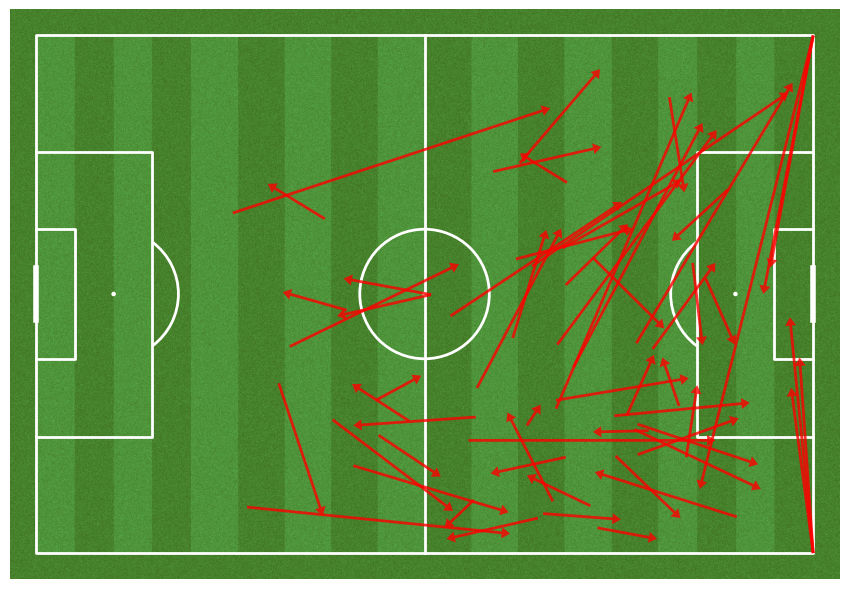

In [37]:
pitch = mpl.Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw(figsize=(9, 6))

p = pitch.arrows(x1, y1, x2, y2, alpha = 0.8, color='red',
                  headaxislength=3,ax=ax, width=2, headwidth=4, headlength=3)

### Shots Analysis

we will analyse Argentina's shots first

In [38]:
shots = events[(events['type'] == "Shot") &
               (events['team'] == "Argentina") &
               (events['shot_type'] != "Penalty")]

In [39]:
x, y = np.array(shots['location'].tolist()).T
xg = np.array(shots['shot_statsbomb_xg'].tolist())
goal = [red if g == "Goal" else 'yellow' for g in shots['shot_outcome'].to_list()]

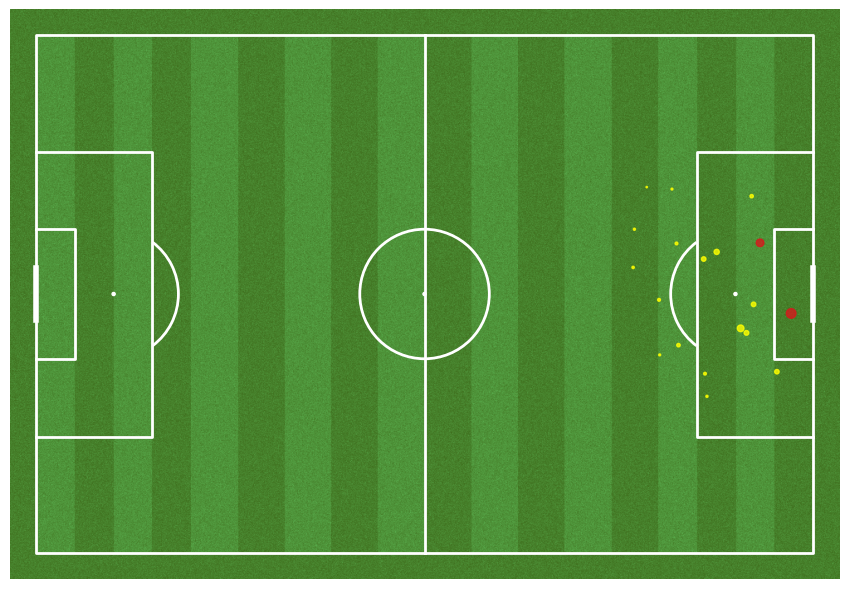

In [40]:
pitch = mpl.Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw(figsize=(9, 6))
p = pitch.scatter(x, y, s=xg*100, c=goal, alpha=0.8, ax=ax)

Now we will do it for Messi's shots

In [41]:
shots = events[(events['type'] == 'Shot') &
                (events['player'] == 'Lionel Andrés Messi Cuccittini') &
                (events['shot_type'] != 'Penalty')]

In [42]:
x, y = np.array(shots['location'].tolist()).T
xg = np.array(shots['shot_statsbomb_xg'].tolist())
goal = [red if g == "Goal" else 'yellow' for g in shots['shot_outcome'].to_list()]


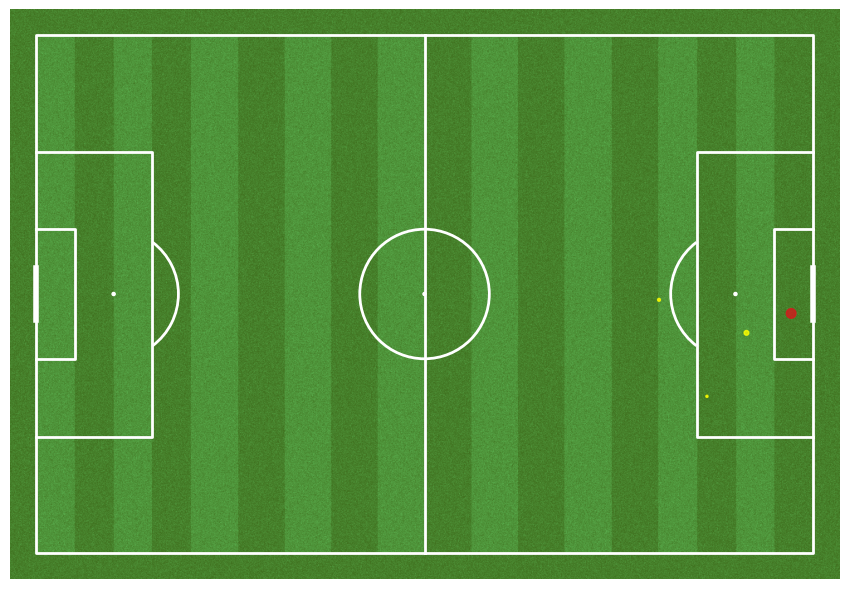

In [43]:
pitch = mpl.Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw(figsize=(9, 6))
p = pitch.scatter(x, y, s=xg*100, c=goal, alpha=0.8, ax=ax)

### HeatMap analysis

In [44]:
arg_events = events[~pd.isna(events['location']) &
                    (events['team'] == "Argentina")]
messi_events = arg_events[arg_events['player'] == 'Lionel Andrés Messi Cuccittini']

In [45]:
x, y = np.array(arg_events['location'].tolist()).T
x_messi, y_messi = np.array(messi_events['location'].tolist()).T

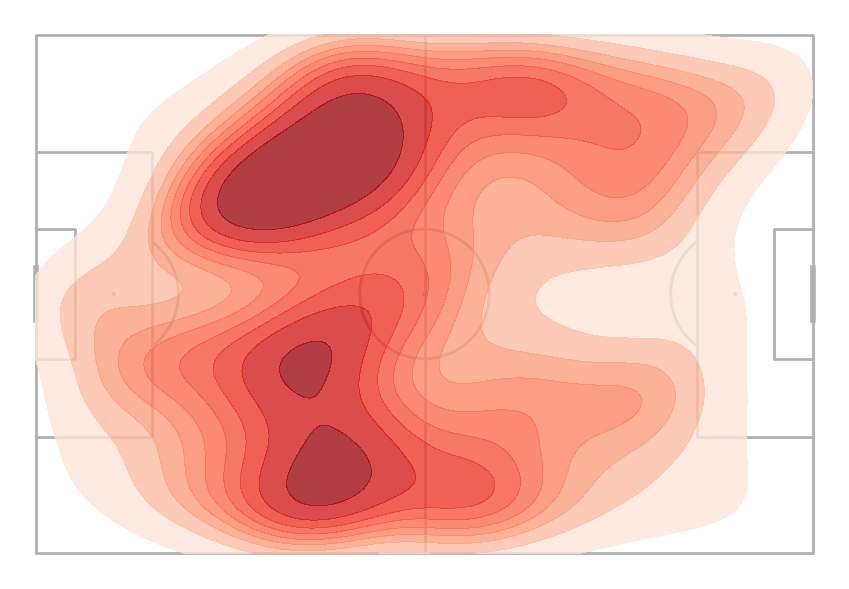

In [46]:

pitch = mpl.Pitch()
fig, ax = pitch.draw(figsize=(9, 6))
k = pitch.kdeplot(x, y, cmap='Reds', fill=True, levels=10, alpha=0.8, ax=ax)

Messi's HeatMap during the game

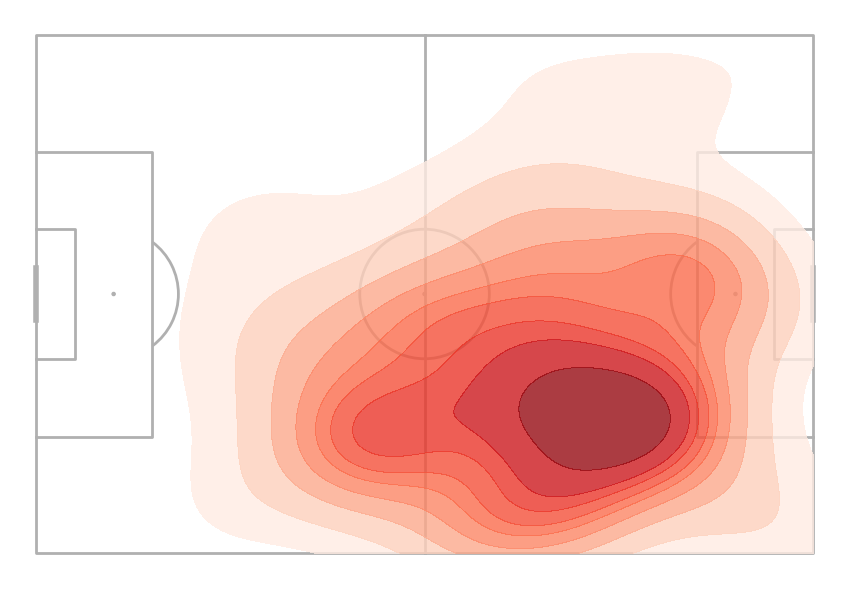

In [47]:
pitch = mpl.Pitch()
fig, ax = pitch.draw(figsize=(9, 6))
k = pitch.kdeplot(x_messi, y_messi, cmap='Reds', fill=True, levels=10, alpha=0.8, ax=ax)

The following heatmap shows the heatmap of the Frensh team 

In [48]:
fr_events = events[~pd.isna(events['location']) &
                    (events['team'] == "France")]
mbappe_events = fr_events[fr_events['player'] == 'Kylian Mbappé Lottin']

In [49]:
xf, yf = np.array(fr_events['location'].tolist()).T
x_mbappe, y_mbappe = np.array(mbappe_events['location'].tolist()).T

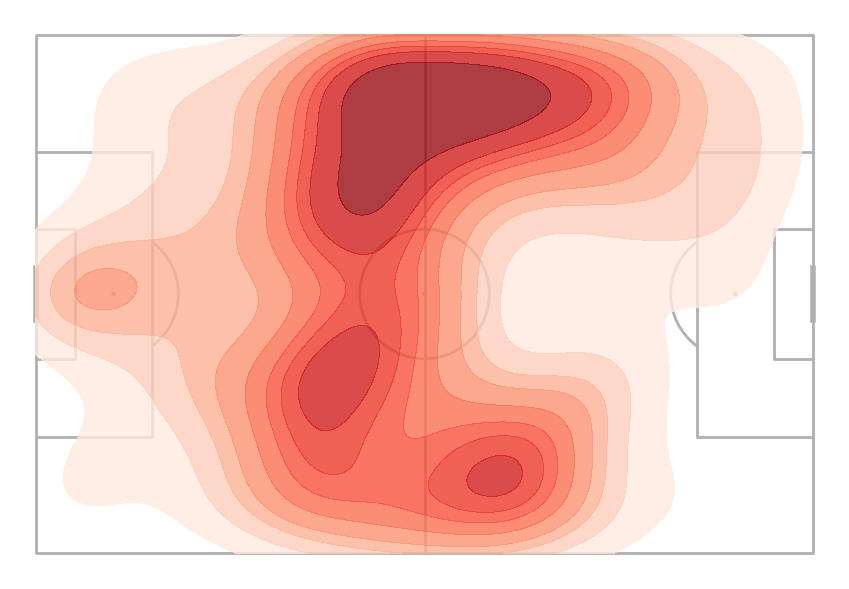

In [50]:
pitch = mpl.Pitch()
fig, ax = pitch.draw(figsize=(9, 6))
k = pitch.kdeplot(xf, yf, cmap='Reds', fill=True, levels=10, alpha=0.8, ax=ax)

And this is Mbappé's heatmap

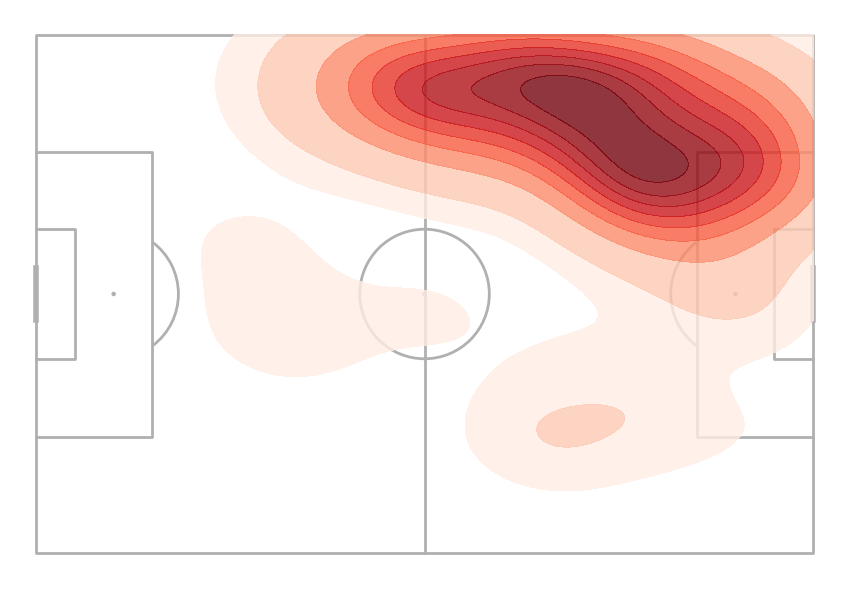

In [51]:
pitch = mpl.Pitch()
fig, ax = pitch.draw(figsize=(9, 6))
k = pitch.kdeplot(x_mbappe, y_mbappe, cmap='Reds', fill=True, levels=10, alpha=0.8, ax=ax)